# Your Favorite Website!

Please fill in the missing information in the specified blocks below to populate a fan site dedicated to a noun (person, place, or thing) that inspires you! Please review the project description on your github repository for details.

It is expected that you should be able to execute full control over the site purely from this Jupyter Notebook! While we do not wish to stifle your artistic spirit, and will not disqualify you for making tweaks to the template files if you find you can't control enough via the code, but we do not want to see the introduction of new tools and frameworks. Also note that all of the files generated for your final solution are ignored by Git ON PURPOSE. You are expected to commit your updates to this notebook ONLY, and through it we'll reproduce your result.

Also note: while we weren't able to deliver on a coding challenge that is language-agnostic, we've tried to keep this challenge syntax light - we believe the languages you will use (Python, Javascript, HTML, and CSS) have basics that are easy to learn. If you don't believe you can complete this challenge in under 4 hours, please reach out to rhodges@ecotrust.org with specifics about which parts are costing you more time than the estimates provided in each `# TODO:` section below.

In [1]:
# DO NOT EDIT
# Some initial setup of your Python
import osmnx as ox # A tool for querying Open Street Map
import geopandas as gpd # A tool for managing geo data
import mediawikiapi # A tool to manage MediaWiki APIs
# By default this will reference the english Wikipedia page: https://en.wikipedia.org
wiki_api = mediawikiapi.MediaWikiAPI()

It is highly recommended that you stick with Wikipedia for now, but if you NEED to pull from a different MediWiki to make your vision complete, the syntax to connect looks something like this:
```
    wiki_api = mediawikiapi.MediaWikiAPI(
        config=mediawikiapi.Config(mediawiki_url="https://www.explainxkcd.com/wiki/api.php")
    )
```
Note that you will replace the 'mediawiki_url' with the 'api.php' endpoint of your target MediaWiki.
The format should look like either:
   * https://your.wiki.source/w/api.php, or
   * https://your.wiki.source/wiki/api.php
   
If your target is not build on [MediaWiki](https://www.mediawiki.org/wiki/MediaWiki) this will not work.

## Step 1: Pick your hero!

We recommend starting with Wikipedia. If your first choice of hero does not have a Wikipedia article, we HIGHLY recommend picking another that is. This challenge includes the [mediawikiapi](https://pypi.org/project/mediawikiapi/) module, which should support most wikis built with MediaWiki (including Wikipedia) and includes the option to draw from other sources, but to remove WikiPedia we cannot promise that you will not also have to rewrite sections of code that are outside the scope of the intended project.

Hints for picking a good hero to make this project easier:
* Pick a hero with an article on Wikipedia
* Pick a hero that is/was not well-known to be an overt racist, sexual predator, mass murderer, or would otherwise likely include some NSFW baggage.
* Pick a hero that has, does, or would exist in a particular physical place on Earth
   * You will be presenting a map related to your hero
   * It may also save you some time to avoid heroes related to the extreme ends of most coordinate systems, i.e.:
      * Not Santa Claus (the North Pole will be hard to map)
      * Eastern Russia, Alaska, and Fiji all cross 180/-180 longitude, and New Zealand is very close.
      * The Polar Ice Caps and Antarctica would be a challenge for the designers of this challenge.

Once you find your preferred topic, please pull the ID for your topic from the WikiPedia URL. For example, if your hero is Pando, the heaviest known organism, the WikiPedia URL is https://en.wikipedia.org/wiki/Pando_(tree) and so your ID would be 'Pando_(tree)'.

BUG WARNING: I have found an issue where if your ID includes both the string 'ad' and '\_' (underscore) some characters are removed from your search string. It's possible this happens with other combinations as well (or the trigger is something else). I have opened [a ticket](https://github.com/lehinevych/MediaWikiAPI/issues/67), so maybe it'll be resolved by the time you work on this.

In [2]:
# TODO: [10 minutes, mostly to decide your 'hero' topic and pull the ID from Wikipedia]
# Edit this constant to represent your Wikipedia article ID
WIKIPEDIA_ID = ''

In [3]:
# REMOVE
WIKIPEDIA_ID = 'Pando_(tree)'

In [4]:
# DO NOT EDIT
try:
    hero_page = wiki_api.page(WIKIPEDIA_ID) 
    print("You will use the variable 'hero_page' to represent your API connection with Wikipedia from now on.")
except Exception as e:
    print("Your WIKIPEDIA_ID was not found. Please review and try again")
    print("For reference, your given value results in the URL 'https://en.wikipedia.org/wiki/{}' for your article.".format(WIKIPEDIA_ID))
    print(e)

You will use the variable 'hero_page' to represent your API connection with Wikipedia from now on.


## Step 2: Get your info into HTML

You will be shoving a lot of data into a web page template using Python. Normally we'd use Django's built-in template language for this (similar to Jinja) but for a project this simple, we can make our own!

A: Review which common types of content your Wiki Article Offers
B: Review and update the HTML templates below to best showcase your content (or build new custom ones)
C: Stuff these HTML elements into a Python Dictionary for later final assembly

In [5]:
# DO NOT EDIT
# This is called a List Comprehension. You should not need to touch this code.
page_elements = [x for x in dir(hero_page) if not x[0] == '_']
print(", ".join(page_elements))
# The only purpose of this code is to show you (below) what elements are associated with your Wiki article:

backlinks, backlinks_ids, categories, content, coordinates, disambiguate_pages, html, images, infobox, lang_title, language, links, original_title, pageid, pageprops, parent_id, references, request, revision_id, section, sections, summary, title, url


The list above includes all of the types of content available from your Wikipedia entry in alphabetical order. We will take a few key ones and build an HTML web page out of them. To do this, we will start by reading each into an HTML element string, and store those strings in a data structure called a [Dictionary](https://www.w3schools.com/python/python_dictionaries.asp). With this, we can organize and loop over each of these elements and stuff them into a full HTML document to be rendered.

The key elements we expect all articles to have are: title, url, summary, section, sections, images, and (hopefully) coordinates.

In [6]:
# DO NOT EDIT
page_content = {}
if hasattr(hero_page, 'coordinates'):
    page_content['coordinates'] = ", ".join([str(float(x)) for x in hero_page.coordinates])
else:
    page_content['coordinates'] = False

In [7]:
# TODO: [1 minute]
# Add value to the key 'url' as-is to page_content (no need to wrap in HTML tags or reformat)

In [8]:
# DO NOT EDIT
# You will want your title to be big and bold. Let's store it as an HTML H1 element
# This is the one element that we will build for you:
page_content['title'] = "<h1>" + hero_page.title + "</h1>"

In [9]:
# TODO: [1-5 minutes]
# You will want to apply different logic/styles to different types of containers. 
# Wrap your content in HTML tags of your choice, keeping in mind how you will want to style these with CSS later...
# For now, let's just add the 'summary'
page_content['summary'] = 'TODO'

In [10]:
# TODO: [5 minutes]
# There are likely more than one image in 'images'. Since knowing Python isn't a requirement, 
#    we'll build the first for loop for you, but trust that you can handle the syntax to build your HTML img elements

image_html_elements = ""
# This iterates over the list of images, assigning each to the 'image' variable 1 at a time
for image in hero_page.images:
    image_html_elements = image_html_elements + "TODO"
    
page_content['images'] = image_html_elements

Reproducing the sections can be a bit harder. Let's look at the two page elements we haven't addressed:
 * **sections**: This is a list of all of the content sections in the article. These will differ wildly from article to article.
 * **section** (no 's'): This is a function - give it one of the values provided by `hero_page.sections` and you will get the content.
 
Below we will print the list of sections in your article for reference. In the folowing `# TODO` section, loop over each value in 'sections' to 

In [11]:
# DO NOT EDIT
print(", ".join(hero_page.sections))

History, Size and age, Range of age estimates, See also, References, Additional references from OECD quote in history section, External links


In [12]:
# TODO: [5-20 minutes, depending on comfort w/ Python]
# Build your sections elements and add them as one long string to the page_content under the key 'sections'

page_content['sections'] = 'TODO'

## Step 3: Get your map info

Many Wikipedia articles have a 'coordinates' element if it is an object that can be mapped (generally something physical that doesn't move much). These (if present) represent a point. Many do not have this element (if your hero is a person, they probably didn't just sit in one place and earn your admiration for it).

In any case, points are kinda boring. If there is a town, region, or nation that your hero was strongly associated with, see if you can pull it up in [Open Street Maps](https://www.openstreetmap.org).

For example, if I'm still talking about Pando (the aspen in Utah), typing 'Pando' into the search bar doesn't get me a good hit right away -- depending on where my map starts I see things like "Pando, Bolivia" (a state) or "Pando, Uruguay" (a city). Be patient, use the 'more results' button and you'll likely get your match. I eventually find mine with the title 'Pando Forest' or better yet 'Pando Forest, Utah, USA'. You want to be specific enough to narrow the results down to 1 hit.

If your hero is the honey badger, you will see a 'map' image in the infobox, but that doesn't mean the GIS data for that feature is readily available. You may need to be picky about a type of honey badger that is limited to a country, or at least one continent (again, avoiding North America and Asia as continents that cross the 180/-180 longitude is a good idea).

In [13]:
# TODO: [5 minutes to find your geometry search term on OSM]
# Get place boundary related to the place name as a geodataframe

#hero_geodataframe = ox.geocode_to_gdf('TODO')

In [14]:
# REMOVE
hero_geodataframe = ox.geocode_to_gdf('Pando Forest, Utah')

<Axes: >

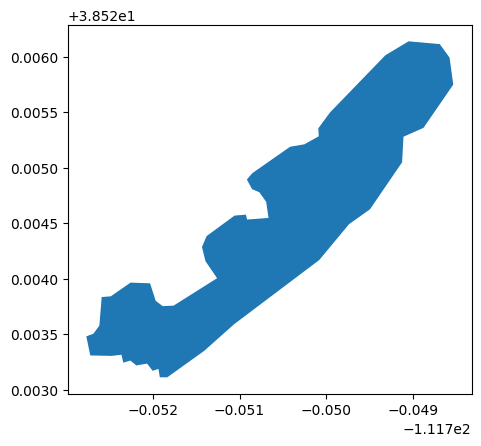

In [15]:
# DO NOT EDIT
# Show your shape to gut-check it looks like the feature you expect to map
hero_geodataframe.plot()

## Step 4: Build your map

To draw your map on a webpage, you'll be using a tool called [OpenLayers](https://openlayers.org/). Using it just to render GeoJSON onto a basemap might be overkill (Leaflet is lighter) OpenLayers is incredibly feature-rich and [well documented](https://openlayers.org/en/latest/apidoc/) with [tons of examples](https://openlayers.org/en/latest/examples/). The HTML template we'll use already pulls OL in from a CDN, so we don't have to worry about installing it.

You're not required to know OpenLayers, so most of the coding lift will be done for you. We would like to see some care to create custom styles in the appropriate section below.

In [16]:
# TODO: [30 minutes]

# To build an OpenLayers map, we need to build several components first.
# For the purposes of this challenge, we'll build strings of JavaScript code to populate our templates

# Below you will be adding your own colors, line thicknesses, etc.. to apply style (cartography)
#    to your map. The color values are RGBA in the format [Red, Green, Blue, Alpha].
#    Use this tool to get the RGB of whatever color you pick: https://color.adobe.com/create/color-wheel
#    RGB values range from 0-255 and are decimal integers.
#    A or 'Alpha' is just how transparent you want your color, from 0 (completely invisible) to 1 (opaque).

styles = "const styles = {};"
styles += "const width = 3;"
# If your feature is one polygon, edit this:
styles += """
styles['Polygon'] = [
    new ol.style.Style({
        fill: new ol.style.Fill({
            color: [255, 255, 255, 0.5],  // Transparent white
        }),
        stroke: new ol.style.Stroke({
            color: [255, 153, 0, 1],     // Orange
            width: width,
        }),
    }),
];
"""

# If your feature has more than 1 polygon, keep this:
styles += """
styles['MultiPolygon'] = 
    styles['Polygon'];
"""

# If your feature is one or more line-strings, use this:
styles += """
styles['LineString'] =
  styles['LineString'] = [
   new ol.style.Style({
     stroke: new ol.style.Stroke({
       color: [255, 255, 255, 1],   // White
       width: width + 2,
     }),
   }),
   new ol.style.Style({
     stroke: new ol.style.Stroke({
       color: [0, 153, 255, 1],     // Blue
       width: width,
     }),
   }),
 ];
 styles['MultiLineString'] = styles['LineString'];
"""

styles += """
styles['Circle'] = styles['Polygon'].concat(
    styles['LineString']
);
"""

# If your feature is one or more points, use this:
styles += """ 
styles['Point'] = [
   new ol.style.Style({
     image: new ol.style.Circle({
       radius: width * 2,
       fill: new ol.style.Fill({
         color: [0, 153, 255, 1],      // Blue
       }),
       stroke: new ol.style.Stroke({
         color: [255, 255, 255, 1],    // White
         width: width / 2,
       }),
     }),
     zIndex: Infinity,
   }),
];
styles['MultiPoint'] =
     styles['Point'];
"""

# Finally, to bring it all together to support an arbitary collection of points, lines, & polygons:
styles += """
styles['GeometryCollection'] =
     styles['Polygon'].concat(
         styles['LineString'],
         styles['Point']
     );
"""

In [17]:
# DO NOT EDIT
# Add your style to the 'MAPSTYLE' key in our content dictionary
page_content['MAPSTYLE'] = styles

# Convert your geometry to a text format to store in our page_content dictionary.
page_content['GEOJSON'] = hero_geodataframe.to_json()

#One more thing: Let's build that 'map' element that OpenLayers will want to render to
page_content['map_element'] = '<div id="map"></div>'

## Step 5: Styles

Whatever you type into the box below will populate the `hero.css` file used to style your page. Use this to style:
* Headers
* Your different element types
* The size/shape of the map box
* Your background
* Anything else you can think of

At this point, we ARE assuming you know CSS basics, so we are not providing you with much, other than a start on the 'map' element, which will be required to make it show.

In [18]:
page_content['CSS'] = """
#map {
    height: 450px;
    width: 450px;
    border: 1px solid blue;
}

/* TODO: Fill this out */

"""


In [19]:
# DO NOT EDIT
print("page_content keys:")
for key in page_content.keys():
    print("\t - {}".format(key))

page_content keys:
	 - coordinates
	 - title
	 - summary
	 - images
	 - sections
	 - MAPSTYLE
	 - GEOJSON
	 - map_element
	 - CSS


## Step 6: Assemble your HTML

We now have a `page_content` dictionary with the keys listed above. They should include:
* coordinates
   * (string) 2 comma-separated values (lat, lon)
* url
   * (string) The URL of your Wiki article
* title
   * (string) HTML header for your page
* summary
   * (string) HTML summary of your article
* images
   * (list) List of HTML elements
* sections
   * (dictionary) Dictionary of HTML values referenced by section name keys
* **GEOJSON**
   * (string) GeoJSON formatted representation of your feature(s)
* **MAPSTYLE**
   * (string) JavaScript OpenLayers Style definition
* map_element
   * (string) HTML element for OpenLayers to bind to
* **CSS**
   * (string) CSS for your site's styles

The ones in CAPS you can find in the templates:
* In templates/hero_map.js.template:
   * `{{ GEOJSON }}` is assigned to a constant called `geojsonObject`
   * `{{ MAPSTYLE }}` is plopped in just below.
* In templates/hero.css.template:
   * `{{ CSS }}` is the only content not commented out.
   
At this point, that all makes sense: you should have written and populated those values with code (JavaScript or CSS) that fits in each.

There is only one instance of `{{ ALLCAPS }}` remaining in the template files we haven't addressed:
* `{{ WIKI_CONTENT }}` in templates/hero.html.template

We will populate that now with HTML. Using the lower-case keys in 'page_content' arrange them into a large

In [20]:
# Use this python box as a scratch-pad/debugging area
#page_content['sections'].keys()
#page_content['sections']['History']

In [21]:
# TODO: [ 45 minutes ]
# Organize, assemble and assign your elements below, and assign them 
#    to the correct key in the page_content dictionary

In [22]:
# REMOVE
page_content['WIKI_CONTENT'] = page_content['map_element']

## Step 7: Generate your files

In [23]:
# DO NOT EDIT
with open("hero/hero.css", "w") as css_out:
    with open("templates/hero.css.template","r") as css_in:
        css_string = css_in.read().replace("{{ CSS }}",page_content['CSS'])
        print(css_string, file=css_out)
        
with open("hero/hero_map.js", "w") as map_out:
    with open("templates/hero_map.js.template","r") as map_in:
        map_string = map_in.read().replace("{{ GEOJSON }}",page_content['GEOJSON']).replace("{{ MAPSTYLE }}",page_content['MAPSTYLE'])
        print(map_string, file=map_out)
        
with open("hero/hero.html", "w") as html_out:
    with open("templates/hero.html.template","r") as html_in:
        html_string = html_in.read().replace("{{ WIKI_CONTENT }}",page_content['WIKI_CONTENT'])
        print(html_string, file=html_out)

You should now be able to open `./hero/hero.html` in a browser and see your result!

Final Checklist:
* [ ] Save all changes to this notebook (see the floppy-disk 'save' icon in the top left of this screen)
   * VERY IMPORTANT TO DO THIS BEFORE COMMITTING!
* [ ] Commit all changes to this notebook
* [ ] Save and commit any changes made in the template files (not recommended)
* [ ] When viewing your final `html` page, print it to .PDF
    * [ ] Save and commit that .PDF at the top of your project `path/to/project/hero_challenge/hero.pdf`
* [ ] DO NOT override the git ignore file to include any contents under your 'hero' directory.
   * Don't worry that \__init__.py is in there.
   * The files generated by the notebook are not to be shared. We will re-run your notebook. If there are any issues with viewing it, we will check your 'hero.pdf' file to determine what you were trying to do.
* [ ] Push all changes to the main branch
* [ ] Email rhodges@ecotrust.org to let the team know your results are ready to review prior to your final interview.